In [121]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [136]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.fftpack import dct, idct
from sklearn.metrics import mean_squared_error

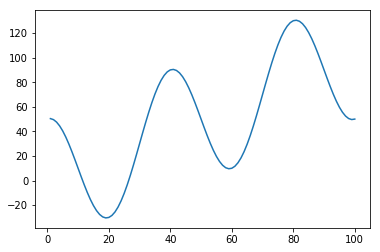

In [123]:
x=np.linspace(1,100,100)
xx=x+50*np.cos(x*2*np.pi/40)
#xx=np.random.normal(0,0.05, 1000)

plt.plot(x,xx)

In [124]:
x_dct=dct(xx,2,norm='ortho')
org_dct=np.copy(x_dct)
x_dct

array([ 5.00000000e+02, -2.86567798e+02, -8.41655612e+00, -3.18303817e+01,
       -1.96289453e+01,  3.41012131e+02,  1.60468018e+01, -5.83672785e+00,
        4.52076944e+00, -3.52615172e+00,  2.34726960e+00, -2.35651741e+00,
        1.47663320e+00, -1.68377880e+00,  1.02532770e+00, -1.26167068e+00,
        7.57050448e-01, -9.79541892e-01,  5.83144814e-01, -7.81690917e-01,
        4.63396779e-01, -6.37597667e-01,  3.77160463e-01, -5.29402256e-01,
        3.12860426e-01, -4.46088499e-01,  2.63562223e-01, -3.80562158e-01,
        2.24890564e-01, -3.28087295e-01,  1.93966943e-01, -2.85404407e-01,
        1.68831055e-01, -2.50210610e-01,  1.48108562e-01, -2.20841448e-01,
        1.30811740e-01, -1.96069664e-01,  1.16215322e-01, -1.74974259e-01,
        1.03776669e-01, -1.56853112e-01,  9.30829984e-02, -1.41163359e-01,
        8.38156413e-02, -1.27479892e-01,  7.57253047e-02, -1.15465937e-01,
        6.86146222e-02, -1.04851872e-01,  6.23256289e-02, -9.54197255e-02,
        5.67306313e-02, -

In [125]:
#np.sort(-np.abs(x_dct))

In [126]:
indx=np.argsort(-np.abs(x_dct))

indx

array([ 0,  5,  1,  3,  4,  6,  2,  7,  8,  9, 11, 10, 13, 12, 15, 14, 17,
       19, 16, 21, 18, 23, 20, 25, 27, 22, 29, 24, 31, 26, 33, 28, 35, 37,
       30, 39, 32, 41, 34, 43, 36, 45, 38, 47, 49, 40, 51, 42, 53, 44, 55,
       46, 57, 48, 59, 50, 61, 52, 63, 54, 65, 56, 67, 58, 69, 60, 71, 62,
       73, 64, 75, 66, 77, 68, 79, 70, 72, 81, 74, 83, 76, 85, 78, 80, 87,
       82, 89, 84, 91, 86, 88, 93, 90, 95, 92, 94, 97, 96, 98, 99])

In [127]:
for i in range(len(indx)):
    if norm(x_dct[indx[0:i]])/norm(x_dct)<0.96:
        d=i
print(d)

2


In [128]:
# d is the number of coefficients
# we set coefficients indexed from d to the end to zero

In [129]:
norm(x_dct[indx[0:d]])/norm(x_dct)

0.9019781855936663

In [130]:
x_dct[indx[d:d+1]]

array([-286.56779799])

In [131]:
x_dct[indx[d:]]=0
x_dct

array([500.       ,   0.       ,   0.       ,   0.       ,   0.       ,
       341.0121307,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0. 

In [132]:
q=idct(x_dct,2, norm='ortho')

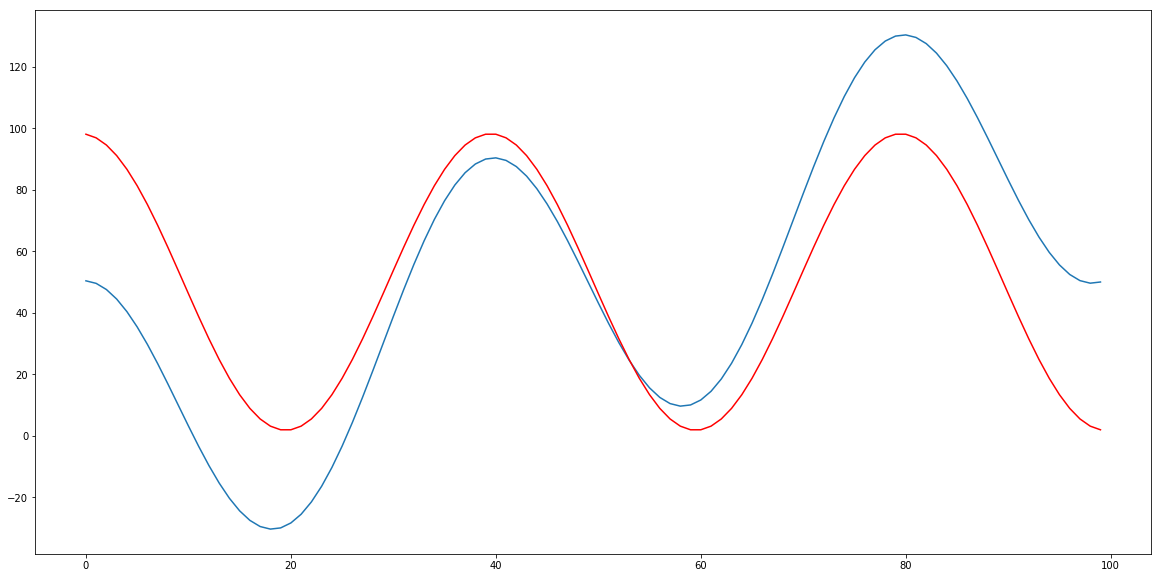

In [133]:
plt.figure(figsize=(20,10))
plt.plot(xx)
plt.plot(q,'r')


In [137]:
mean_squared_error(xx,q)

839.3834477424335

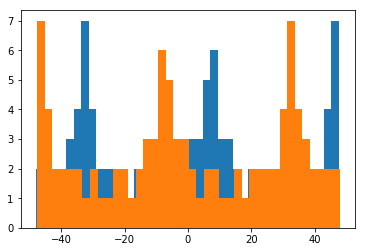

In [134]:
plt.hist(q-xx,40)
plt.hist(xx-q,40)
plt.show()

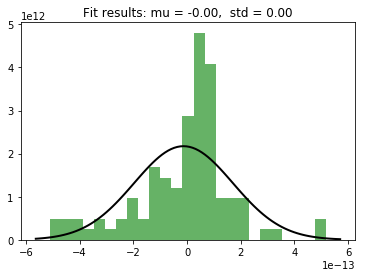

In [11]:
import numpy as np
from scipy.stats import norming the signaling the signal
import matplotlib.pyplot as plt

err=q-xx
# Generate some data for this demonstration.
#data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(err)

# Plot the histogram.
plt.hist(err, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

ValueError: operands could not be broadcast together with shapes (101,) (1000,) 

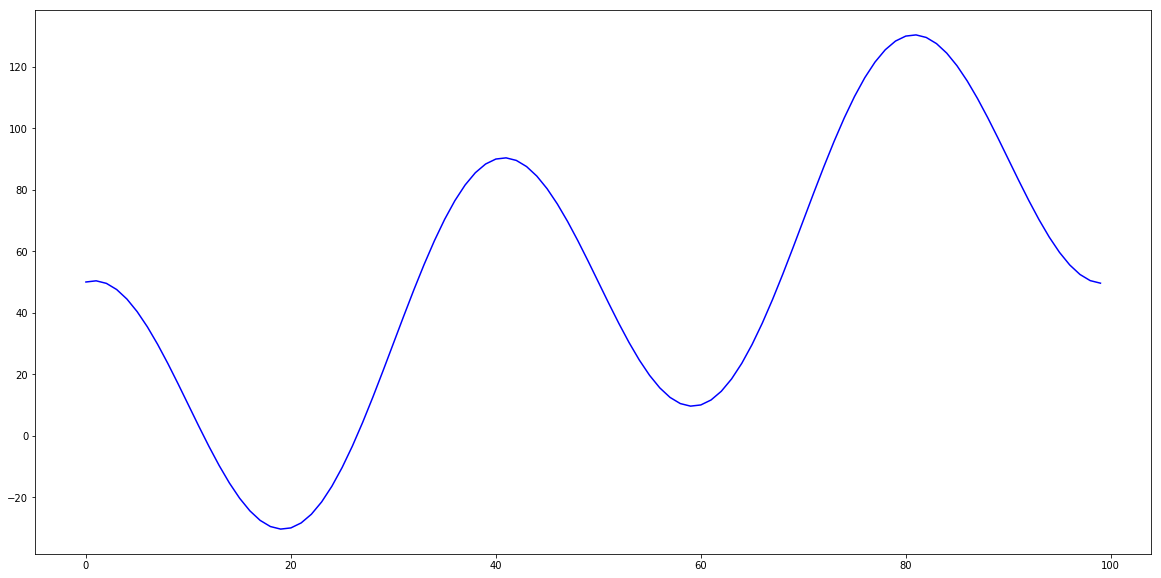

In [12]:
data = norm.rvs(0.0, 0.05, size=1000)
plt.figure(figsize=(20,10))
plt.plot(xx[0:100],'b')
reco=xx+data
#plt.plot(reco[0:100], 'r')
plt.plot(q[0:100], 'g')
plt.legend(['Original sig', ' With added Normal noise', 'using DCT'])

In [125]:
np.exp(-3)

0.049787068367863944

In [ ]:
plt.hist(y.flatten())
plt.show()

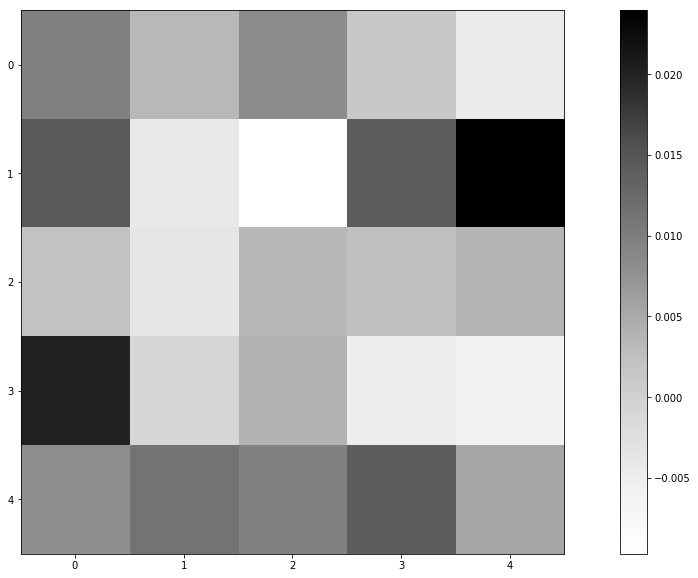

In [207]:
xx=np.random.normal(0,0.01, (5,5))

fig, ax = plt.subplots(figsize=(20,10))
x_dct=dct(xx,2,norm='ortho')
im=plt.imshow(x_dct,'Greys')
fig.colorbar(im, ax=ax)

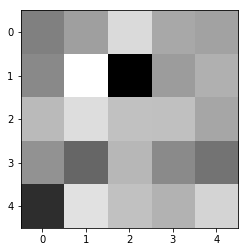

In [208]:
im=plt.imshow(xx,'Greys')


In [ ]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
im=ax.imshow(y,cmap='cool')
fig.colorbar(im, orientation='vertical')
plt.show()

In [ ]:
0